# **EDA Notebook: Exploratory Data Analysis and Preprocessing**

This notebook performs exploratory data analysis (EDA)and data preprocessing, for policy extraction. Each step is explained with
comments and outputs are visualized to gain insights.

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# Load dataset from file
file_path = '/content/processed_dataset.csv'
data = pd.read_csv(file_path)

In [3]:
# Display the first few rows to understand the structure
print("Dataset Preview:")
print(data.head())
# Check the shape of the dataset
print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

Dataset Preview:
   CNTSCHID  CNTSTUID STRATUM  REPEAT  WORKPAY  DURECEC  SISCO  SCHRISK  \
0  50400025  50400011   MAR01       0        0        5      1   0.5348   
1  50400152  50400019   MAR01       0        0        2      1  -0.6386   
2  50400093  50400034   MAR01       0        0        2      1   0.5348   
3  50400137  50400052   MAR01       1        0        0      9  -0.6386   
4  50400021  50400065   MAR01       1        2        2      1   0.5348   

   INFOSEEK    ESCS  ICTSCH  ICTAVSCH  ICTQUAL  ICTENQ   MPVMATH   MPVREAD  \
0    0.2264  1.0273  0.4062         7  -0.2205  3.7481  360.7487  355.3656   
1    0.8970 -2.4400  0.4062         7  -0.6091  0.3041  461.7184  487.5750   
2    0.4893  0.6817  0.4062         7  -0.7818  0.4455  414.4962  460.3951   
3   -1.1032 -3.1341  0.4062         7   0.4758 -1.1168  340.1526  284.2741   
4    0.8060 -1.1593  0.4062         7  -2.8028 -2.3763  396.9762  347.6067   

    MPVSCIE  
0  338.8896  
1  488.9350  
2  423.1751  
3  347.

***Handle Missing Values***

In [4]:
# Replace invalid codes with NaN for cleaning purposes
missing_codes = [95.0000, 99.0000]  # Add other invalid codes if needed
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce').replace(missing_codes, pd.NA)

In [5]:
# Display missing values summary
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
missing_df = pd.DataFrame({"Missing Count": missing_values, "Percentage": missing_percentage}).sort_values(by="Percentage", ascending=False)
print("Missing Values Summary:")
print(missing_df)

Missing Values Summary:
          Missing Count  Percentage
STRATUM            6867       100.0
CNTSCHID              0         0.0
ESCS                  0         0.0
MPVREAD               0         0.0
MPVMATH               0         0.0
ICTENQ                0         0.0
ICTQUAL               0         0.0
ICTAVSCH              0         0.0
ICTSCH                0         0.0
INFOSEEK              0         0.0
CNTSTUID              0         0.0
SCHRISK               0         0.0
SISCO                 0         0.0
DURECEC               0         0.0
WORKPAY               0         0.0
REPEAT                0         0.0
MPVSCIE               0         0.0


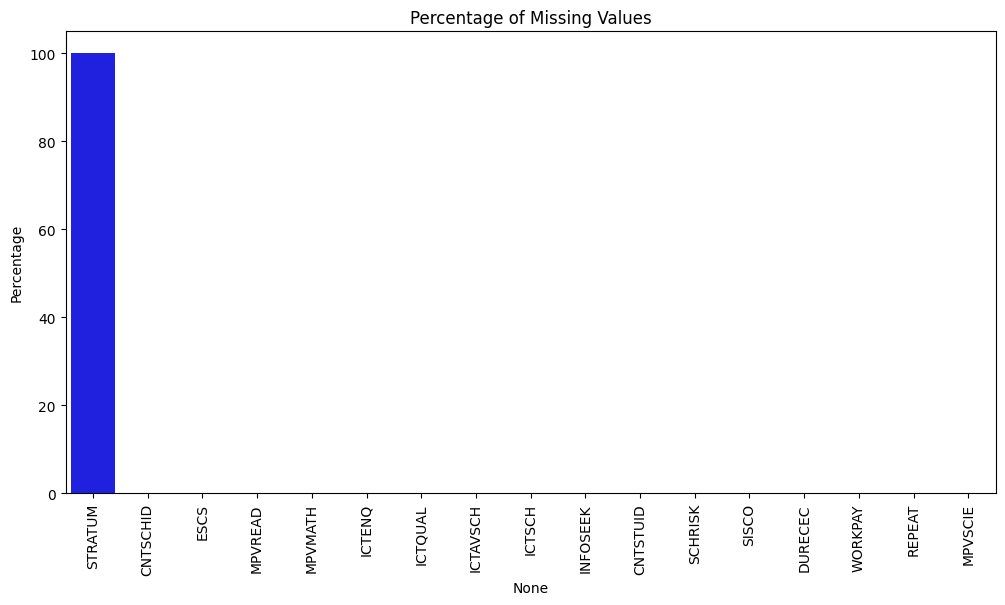

In [6]:
# Visualize missing values percentage
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_df.index, y=missing_df['Percentage'], color='blue')
plt.xticks(rotation=90)
plt.title("Percentage of Missing Values")
plt.ylabel("Percentage")
plt.show()

***Step 3: Overview of Dataset***

In [7]:
# Print basic information about the dataset
print("Dataset Overview:")
print(data.info())

# Summary statistics for numerical columns
print("\nDescriptive Statistics:")
print(data.describe())

# Dropping unnecessary column for further analysis
data.drop(columns=['STRATUM'], inplace=True)

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6867 entries, 0 to 6866
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CNTSCHID  6867 non-null   int64  
 1   CNTSTUID  6867 non-null   int64  
 2   STRATUM   0 non-null      float64
 3   REPEAT    6867 non-null   int64  
 4   WORKPAY   6867 non-null   int64  
 5   DURECEC   6867 non-null   int64  
 6   SISCO     6867 non-null   int64  
 7   SCHRISK   6867 non-null   float64
 8   INFOSEEK  6867 non-null   float64
 9   ESCS      6867 non-null   float64
 10  ICTSCH    6867 non-null   float64
 11  ICTAVSCH  6867 non-null   int64  
 12  ICTQUAL   6867 non-null   float64
 13  ICTENQ    6867 non-null   float64
 14  MPVMATH   6867 non-null   float64
 15  MPVREAD   6867 non-null   float64
 16  MPVSCIE   6867 non-null   float64
dtypes: float64(10), int64(7)
memory usage: 912.1 KB
None

Descriptive Statistics:
           CNTSCHID      CNTSTUID  STRATUM       RE

***Step 4: Correlation Matrix***

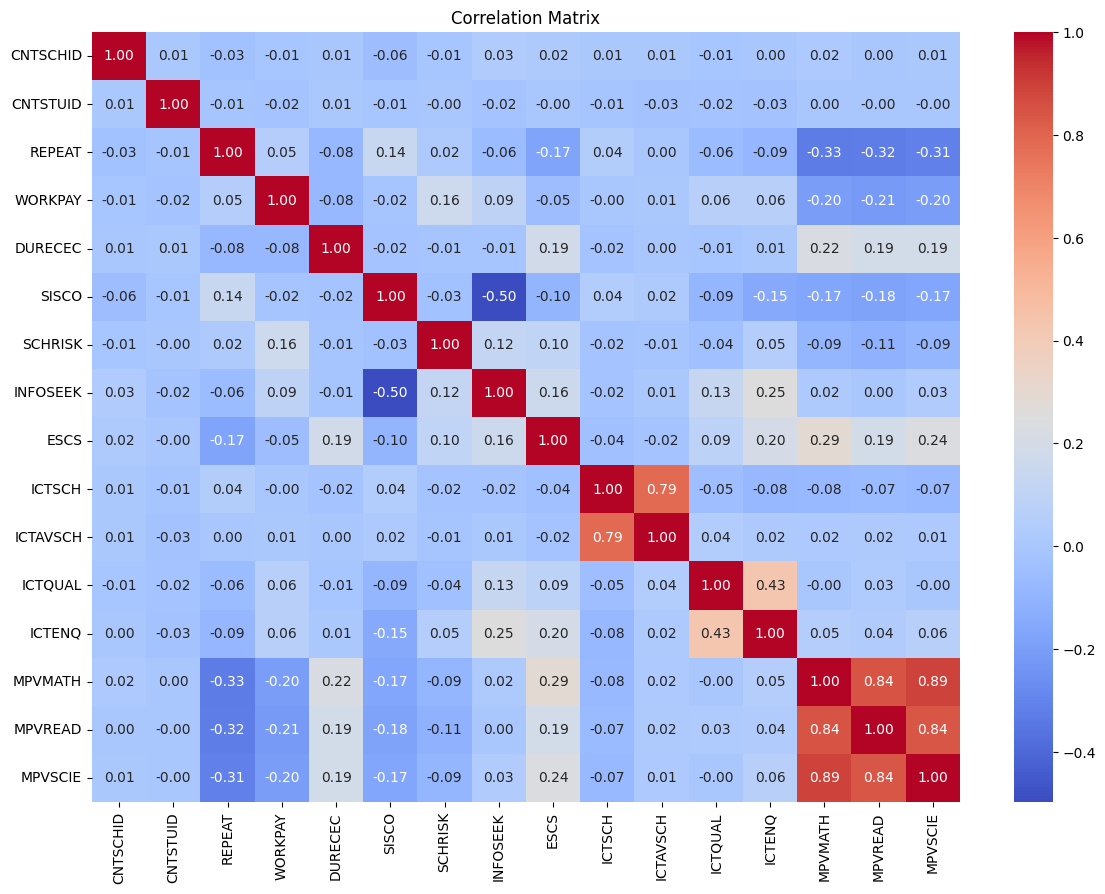

In [8]:
# Compute correlation matrix to understand relationships between numerical features
correlation_matrix = data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

***Step 5: Distribution Analysis for Numerical Columns***

Numerical Columns for Distribution Analysis:
Index(['CNTSCHID', 'CNTSTUID', 'REPEAT', 'WORKPAY', 'DURECEC', 'SISCO',
       'SCHRISK', 'INFOSEEK', 'ESCS', 'ICTSCH', 'ICTAVSCH', 'ICTQUAL',
       'ICTENQ', 'MPVMATH', 'MPVREAD', 'MPVSCIE'],
      dtype='object')


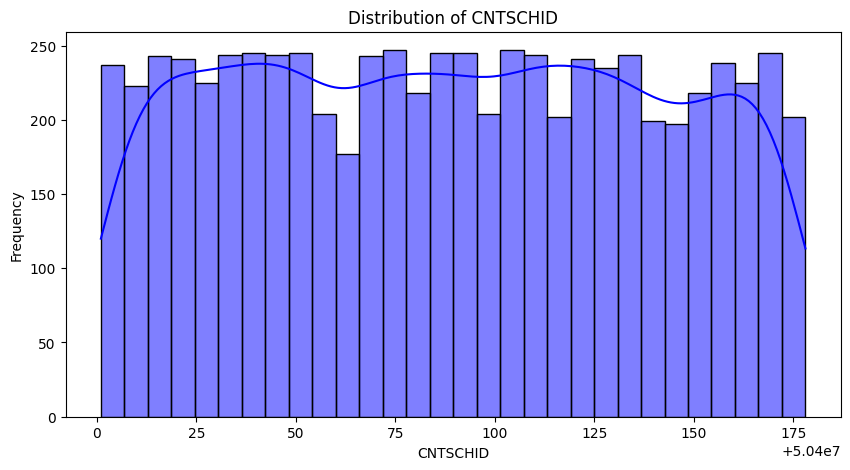

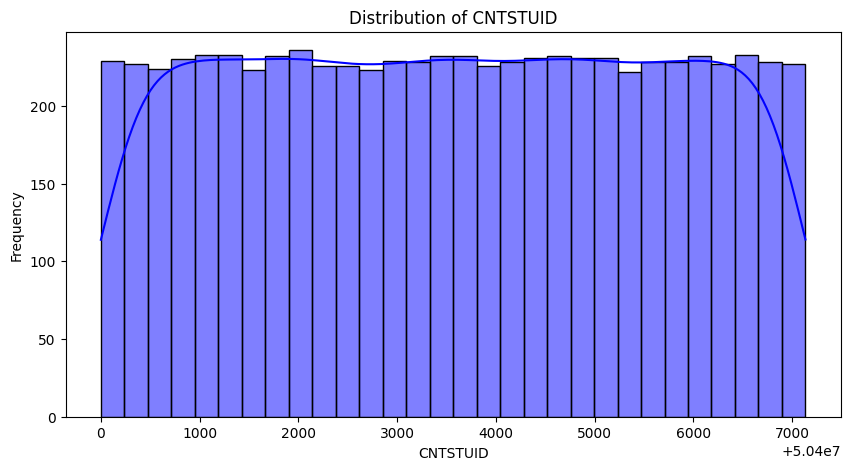

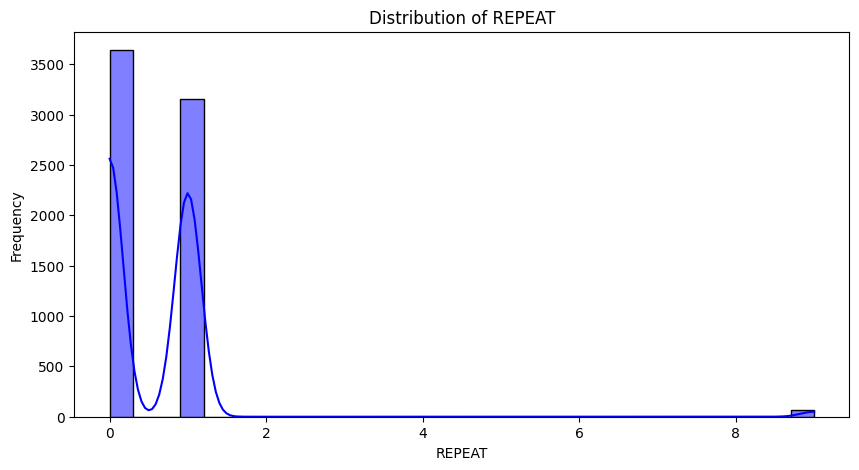

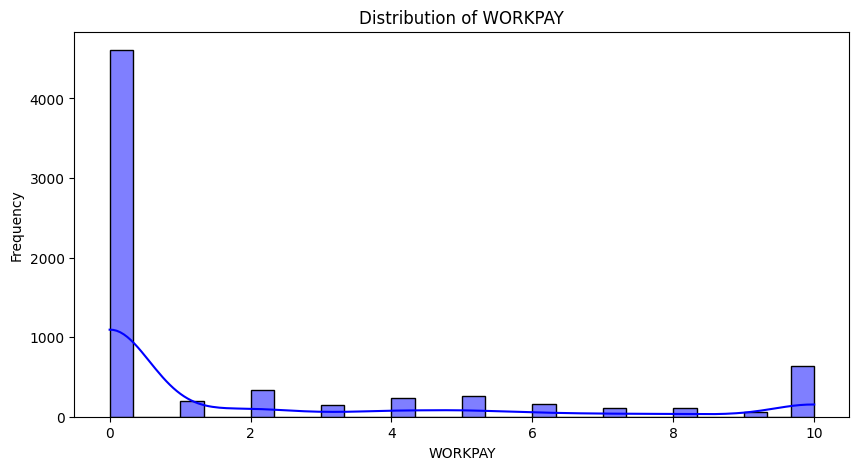

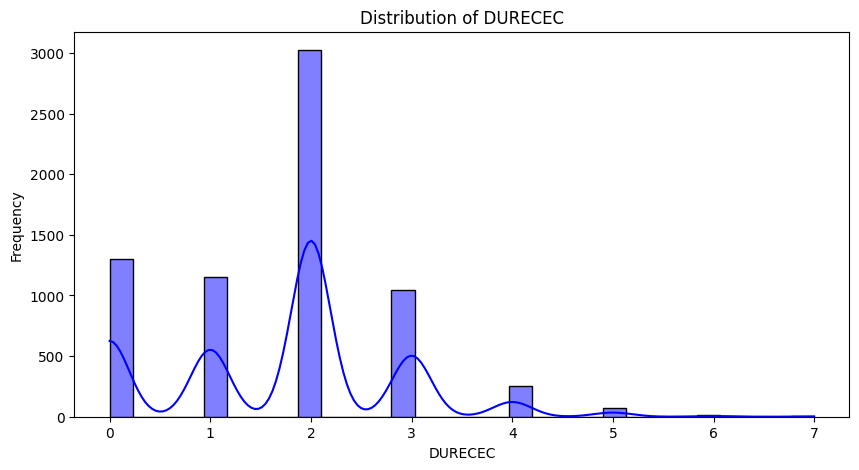

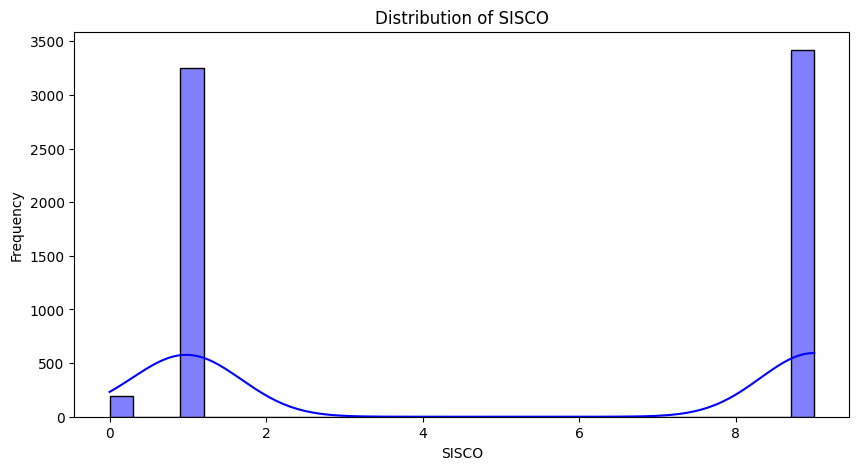

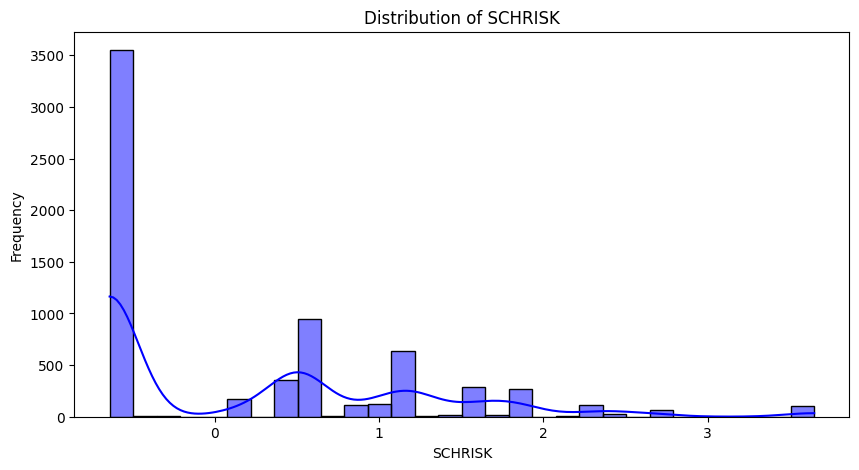

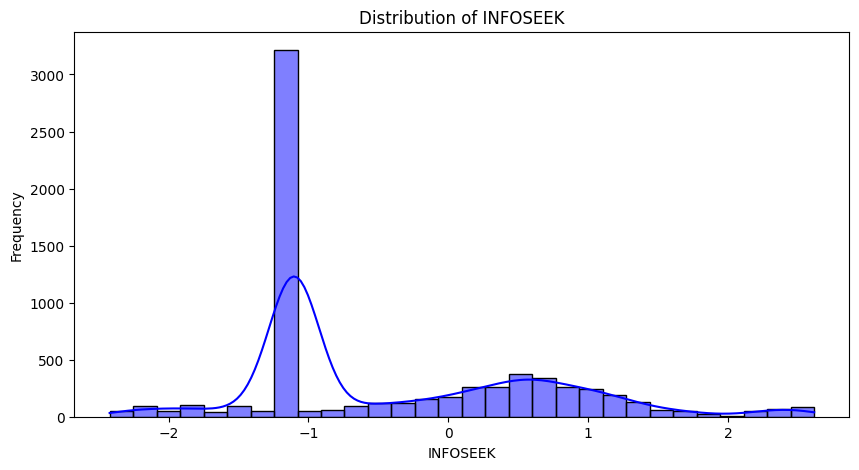

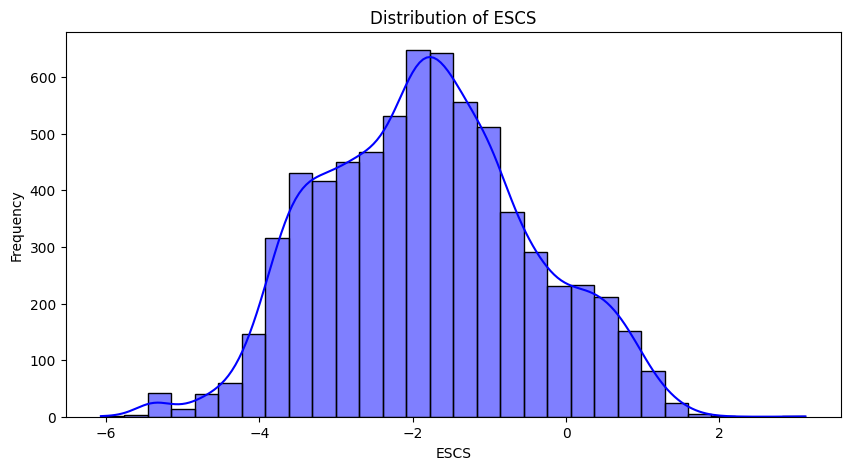

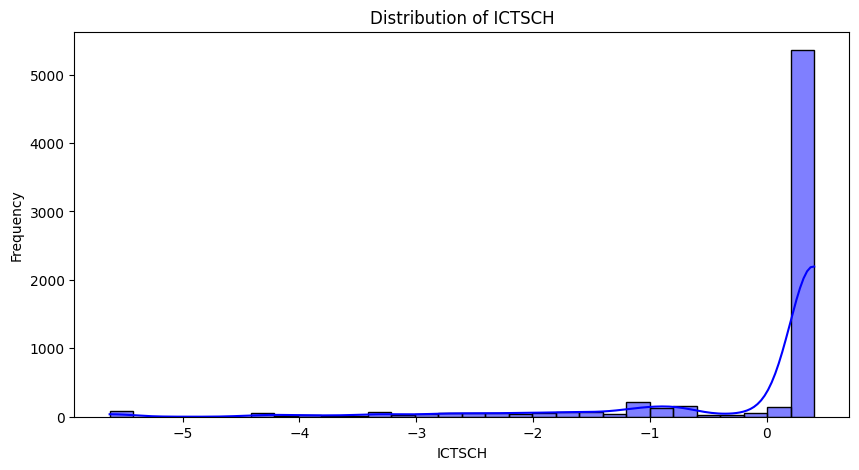

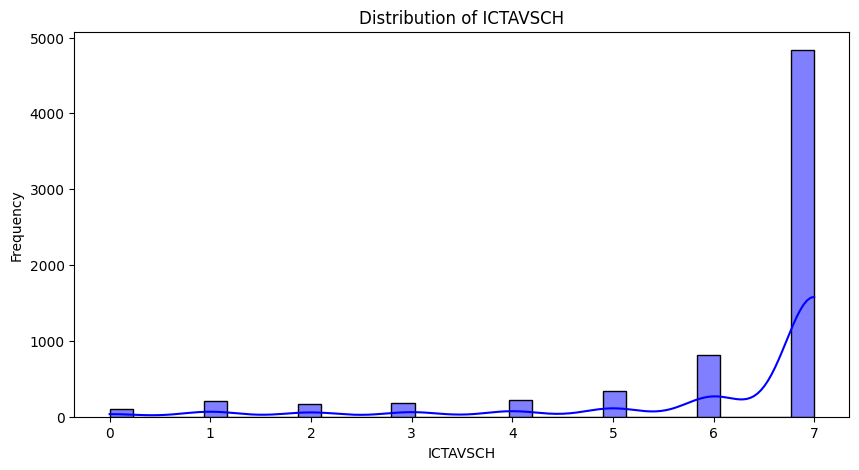

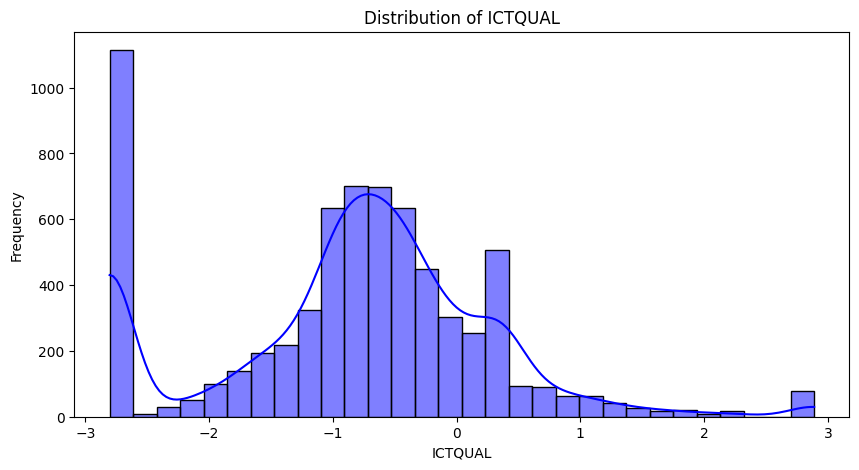

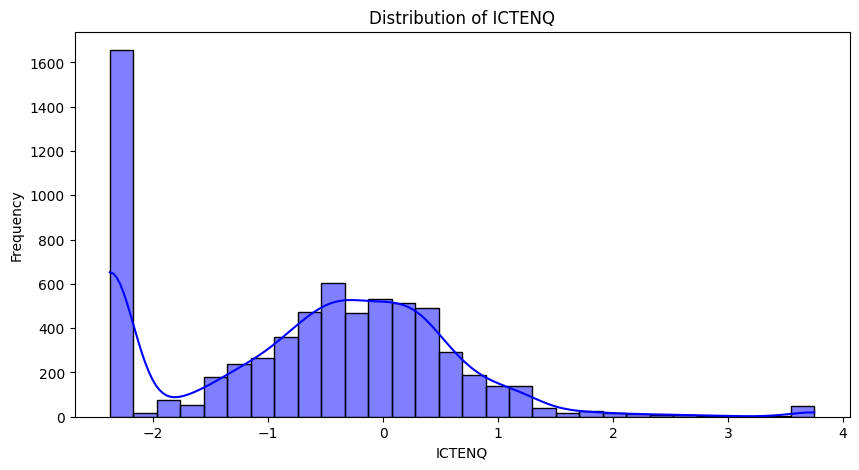

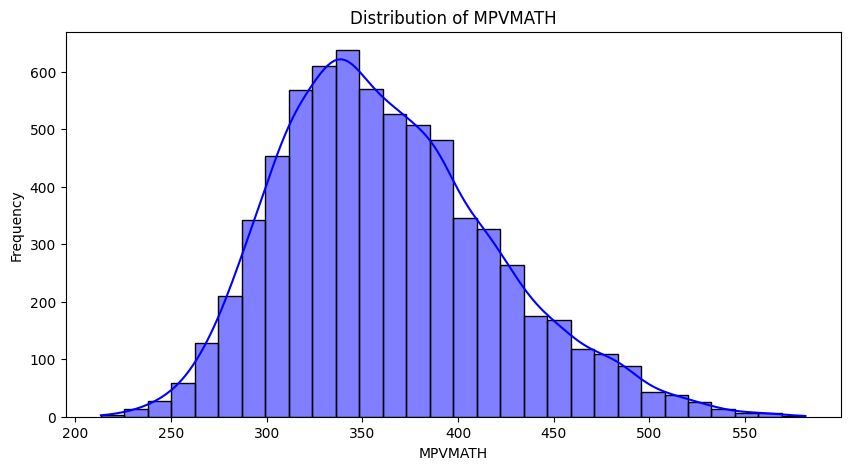

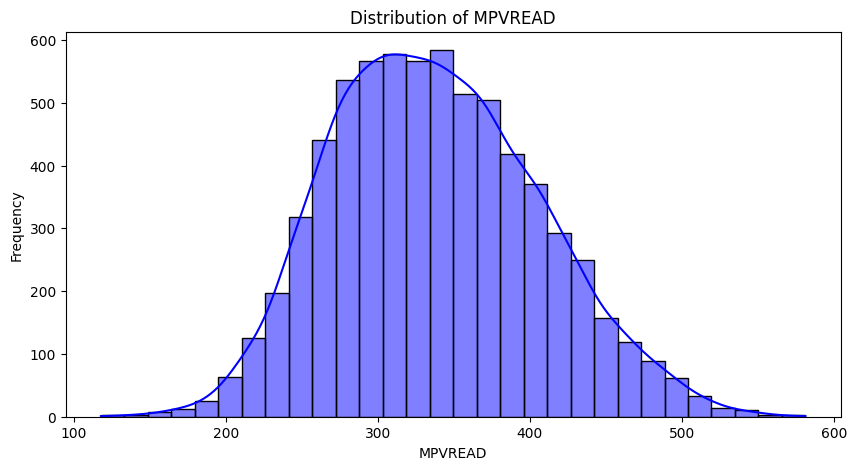

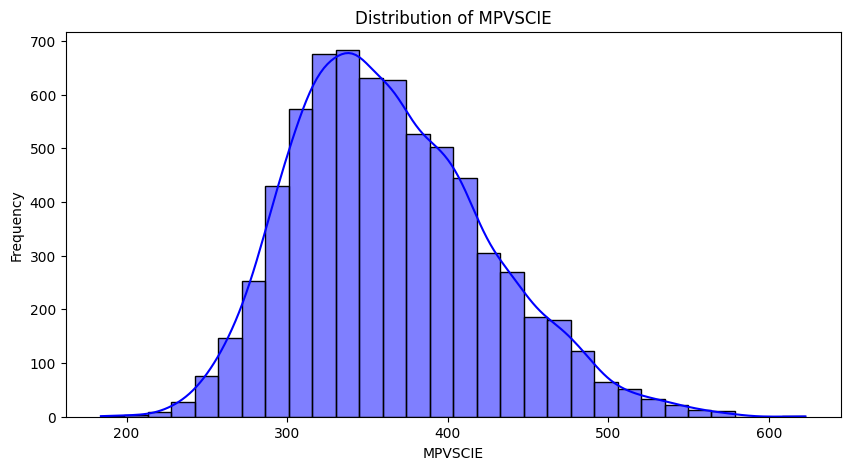

In [9]:
# Identify numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

print("Numerical Columns for Distribution Analysis:")
print(numerical_columns)

# Plot distribution for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[col].dropna(), kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

***Step 6: Boxplots for Outlier Detection***

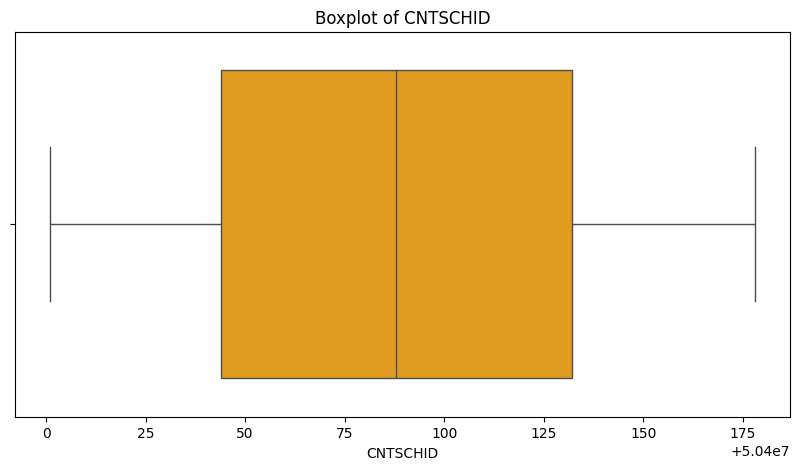

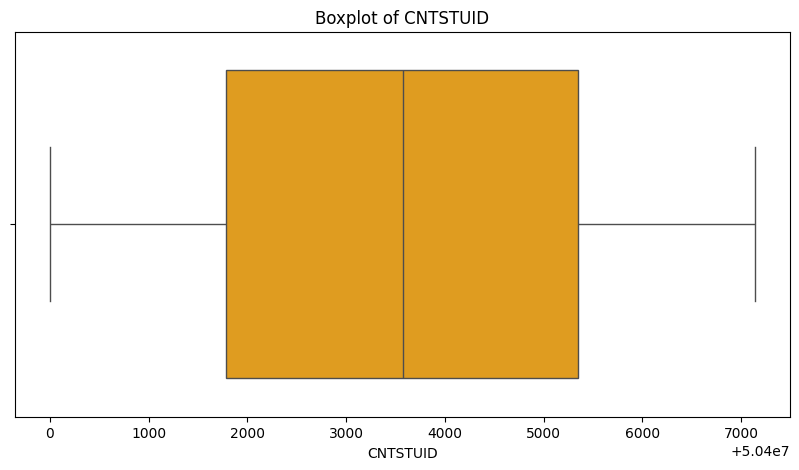

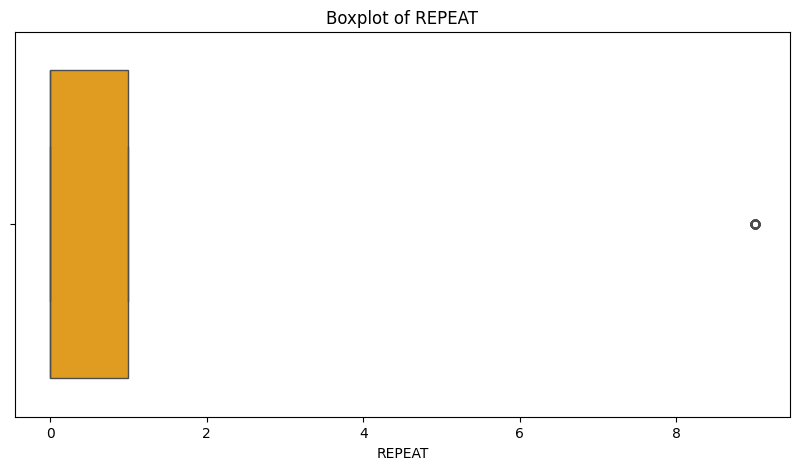

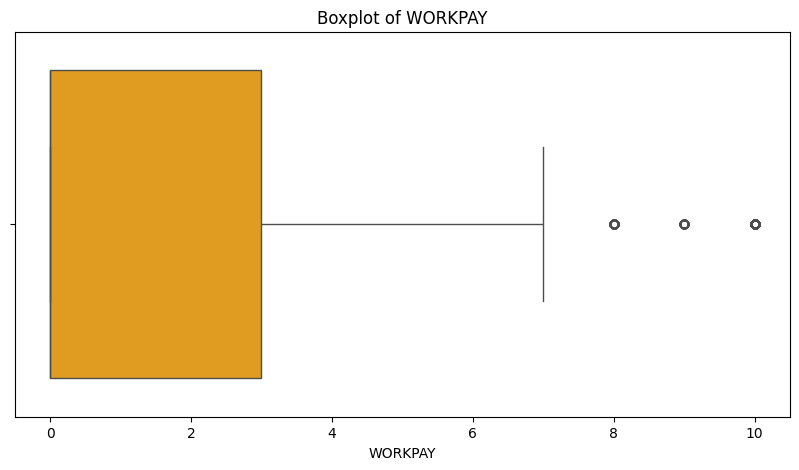

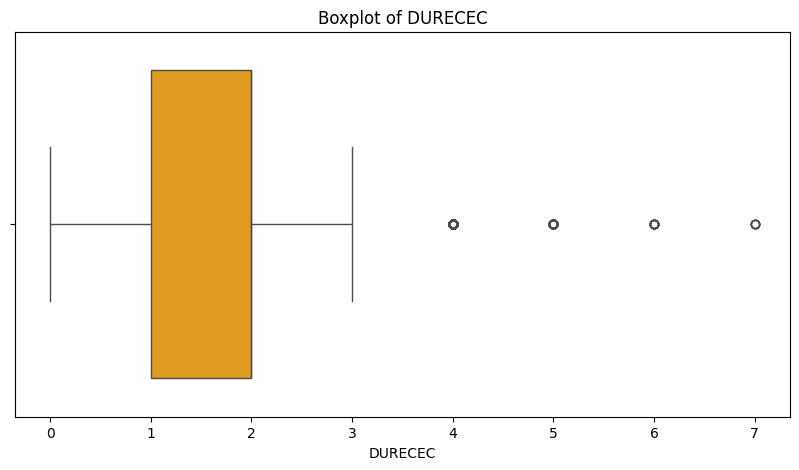

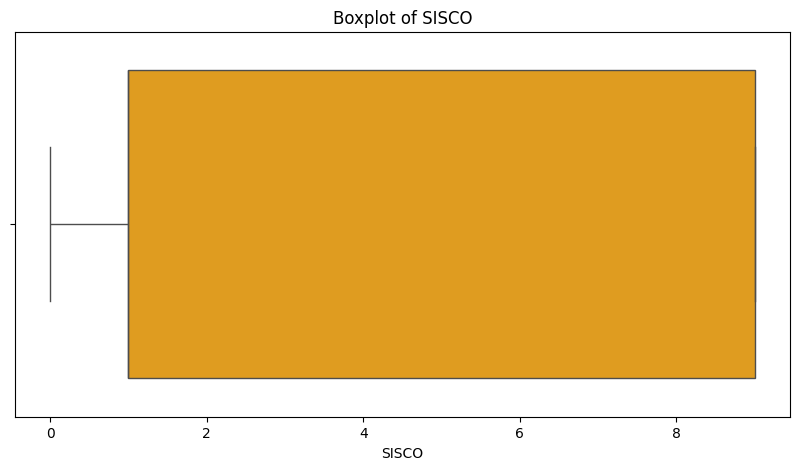

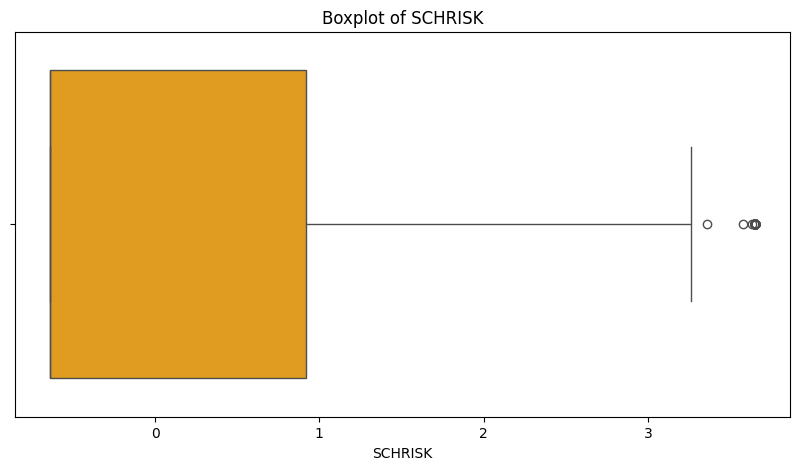

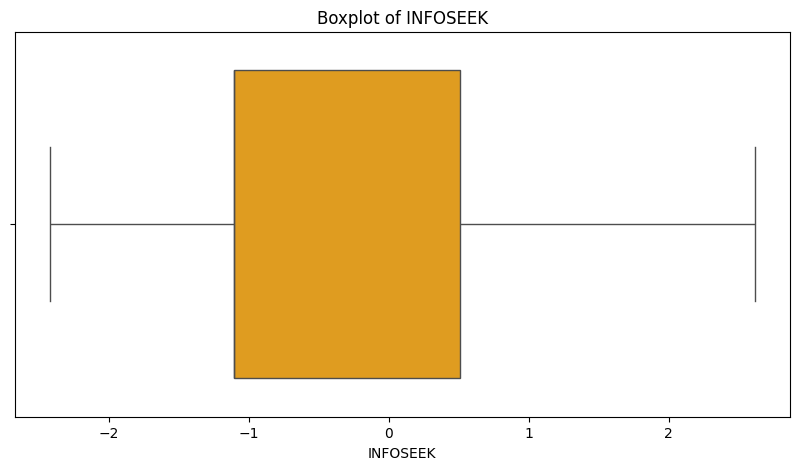

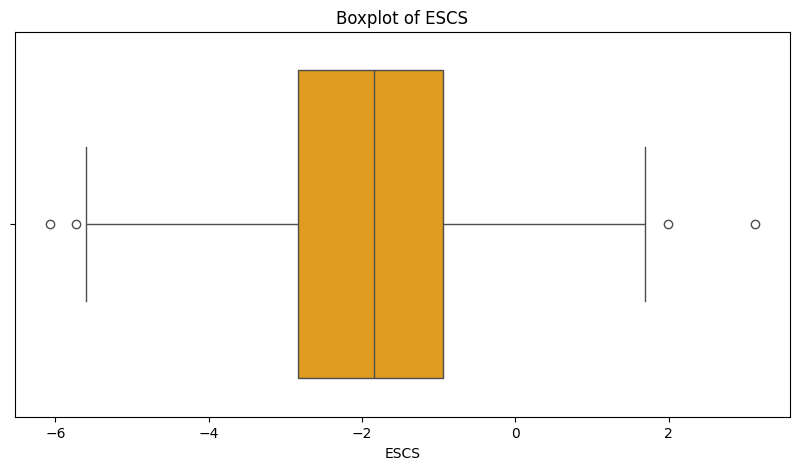

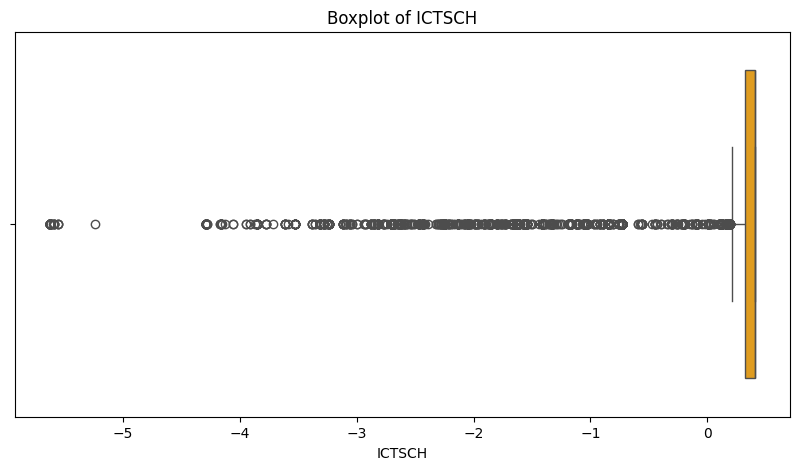

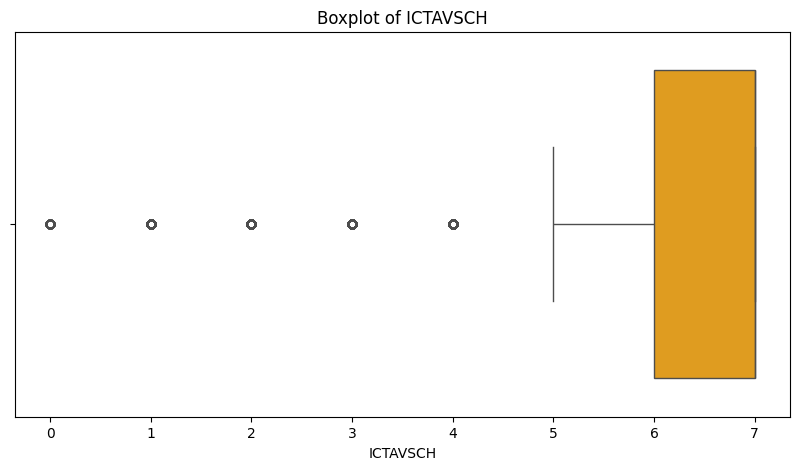

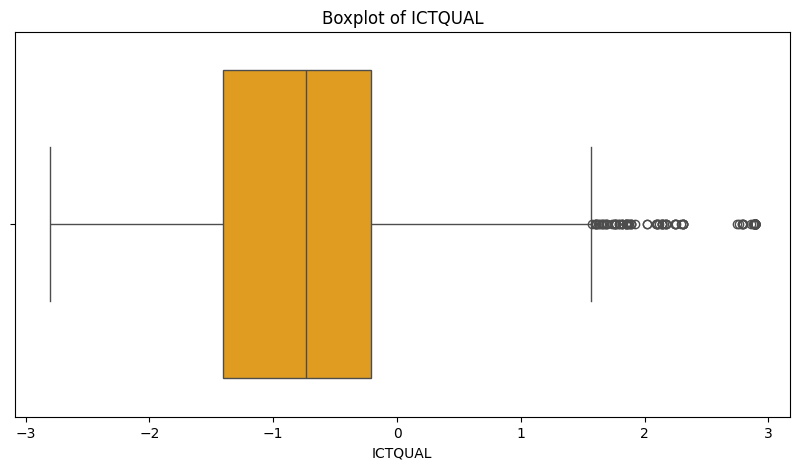

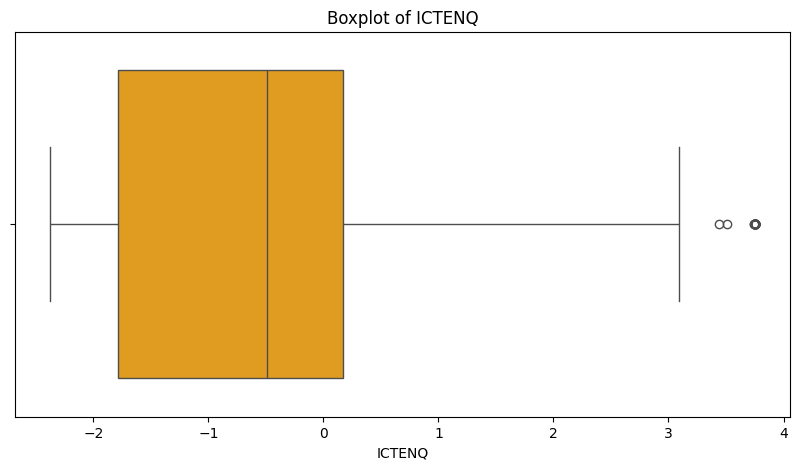

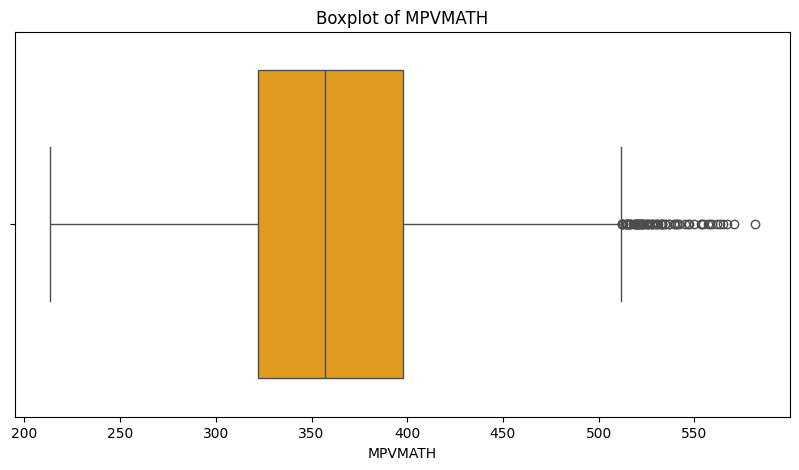

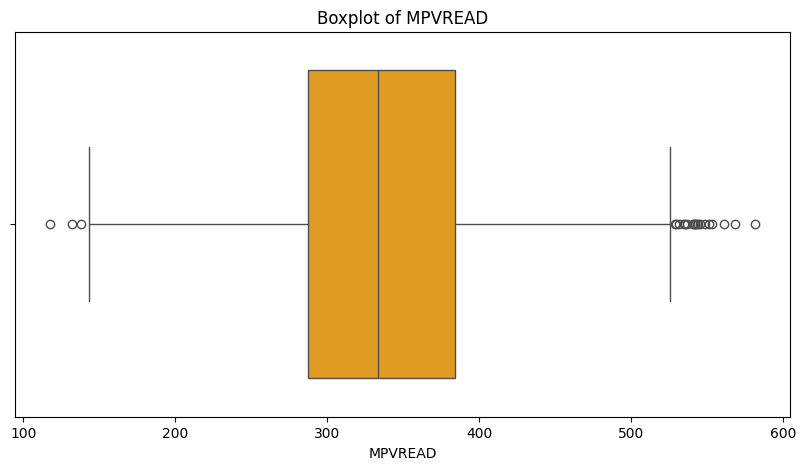

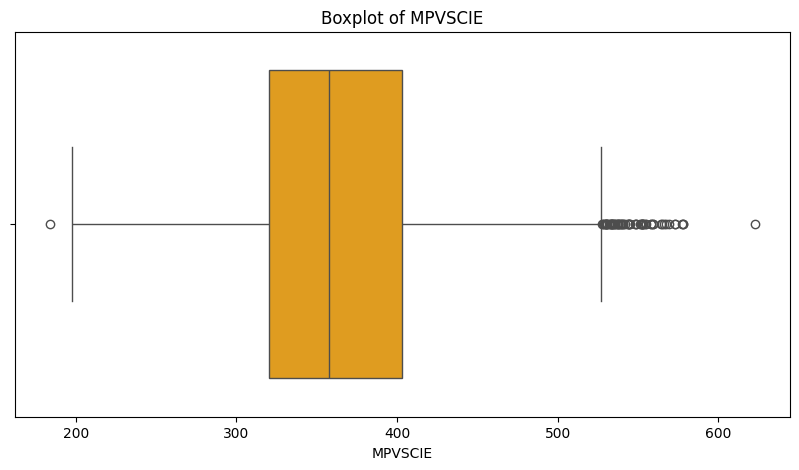

In [10]:
# Plot boxplots to detect outliers for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[col], color='orange')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()